# Multi-Modal Data Fusion - Project Work: Multi-Modal Physical Exercise Classification


In this project, real multi-modal data is studied by utilizing different techniques presented during the course. In addition, there is an optional task to try some different approaches to identify persons from the same dataset. Open MEx dataset from UCI machine learning repository is used. Idea is to apply different techniques to recognize physical exercises from wearable sensors and depth camera, user-independently.

## Author(s)
Add your information here

Name(s):
Aleksander Madajczak,
Jan Fabian

Student number(s):
2207367
2207371


## Description

The goal of this project is to develop user-independent pre-processing and classification models to recognize 7 different physical exercises measured by accelerometer (attached to subject's thigh) and depth camera (above the subject facing downwards recording an aerial view). All the exercises were performed subject lying down on the mat. Original dataset have also another acceleration sensor and pressure-sensitive mat, but those two modalities are ommited in this project. There are totally 30 subjects in the original dataset, and in this work subset of 10 person is utilized. Detailed description of the dataset and original data can be access in [MEx dataset @ UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/MEx#). We are providing the subset of dataset in Moodle.

The project work is divided on following phases:

1. Data preparation, exploration, and visualization
2. Feature extraction and unimodal fusion for classification
3. Feature extraction and feature-level fusion for multimodal classification
4. Decision-level fusion for multimodal classification
5. Bonus task: Multimodal biometric identification of persons

where 1-4 are compulsory (max. 10 points each), and 5 is optional to get bonus points (max. 5+5 points). In each phase, you should visualize and analyse the results and document the work and findings properly by text blocks and figures between the code. <b> Nice looking </b> and <b> informative </b> notebook representing your results and analysis will be part of the grading in addition to actual implementation.

The results are validated using confusion matrices and F1 scores. F1 macro score is given as
<br>
<br>
$
\begin{equation}
F1_{macro} = \frac{1}{N} \sum_i^N F1_i,
\end{equation}
$
<br>
<br>
where $F1_i = 2  \frac{precision_i * recall_i}{precision_i + recall_i}$, and $N$ is the number of labels.
<br>

## Learning goals

After the project work, you should

- be able to study real world multi-modal data
- be able to apply different data fusion techniques to real-world problem
- be able to evaluate the results
- be able to analyse the outcome
- be able to document your work properly

## Relevant lectures

Lectures 1-8

## Relevant exercises

Exercises 0-6

## Relevant chapters in course book

Chapter 1-14

## Additional Material

* Original dataset [MEx dataset @ UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/MEx#)
* Related scientific article [MEx: Multi-modal Exercises Dataset for Human Activity Recognition](https://arxiv.org/pdf/1908.08992.pdf)

# 1. Data preparation, exploration, and visualization

<a id='task1'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 1.</b>

Download data from the Moodle's Project section. Get yourself familiar with the folder structure and data. You can read the data files using the function given below. Each file consists one exercise type performed by single user. Data are divided on multiple folders. Note that, in each folder there is one long sequence of single exercise, except exercise 4 which is performed two times in different ways. Those two sequences belongs to same class. Do the following subtasks to pre-analyse data examples and to prepare the training and testing data for next tasks:
<br>
<br> 
<p> Read raw data from the files. Prepare and divide each data file to shorter sequences using windowing method. Similar to related article "MEx: Multi-modal Exercises Dataset for Human Activity Recognition", use 5 second window and 3 second overlapping between windows, producing several example sequences from one exercise file for classification purposes. Windowing is working so that starting from the beginning of each long exercise sequence, take 5 seconds of data points (from synchronized acceleration data and depth images) based on the time stamps. Next, move the window 2 seconds forward and take another 5 seconds of data. Then continue this until your are at the end of sequence. Each window will consists 500x3 matrix of acceleration data and 5x192 matrix of depth image data.</p>
<br>  
<p> <b>1.1</b> Plot few examples of prepared data for each modalities (accelometer and depth camera). Plot acceleration sensor as multi-dimensional time-series and depth camera data as 2D image. Plot 5 second acceleration sensor and depth image sequences of person 1 and 5 performing exercises 2, 5, and 6. Take the first windowed example from the long exercise sequence. </p>
<br>
<p> <b>1.2</b> Split the prepared dataset to training and testing datasets so that data of persons 1-7 are used for training and data of persons 8-10 are used for testing. In next tasks, training dataset could be further divided on (multiple) validation data folds to tune the models parameters, when needed.<br>
    
<p> Note: Training set should have 1486 windows and testing set should have 598 windows. In training set, acceleration data will have a window without a pair with depth camera data, that window should be dropped as it doesn't have a pair.<p>
    
    
    
    
Document your work, calculate the indicator statistics of training and testing datasets (number of examples, dimensions of each example) and visualize prepared examples.

</div>

In [1]:
# Import relevant libraries here
from pathlib import Path
from copy import deepcopy
import numpy as np
import pandas as pd

# Enter data folder location
loc = "./MEx"

In [18]:
def path_to_meta(p):
    meta = dict()
    meta["subject_id"] = p.parent.stem
    meta["exercise_id"] = p.stem.split("_")[-2]
    meta["trial"] = int(p.stem.split("_")[-1])
    meta["sensor_code"] = p.stem.split("_")[0]
    meta["sensor"] = {"act": "acc", "dc": "dc"}[meta["sensor_code"]]
    return meta

# Find, read, and compose the measurements
paths_record = Path(loc).glob("*/*/*.csv")

records = []

for path_record in paths_record:
    df = pd.read_csv(path_record, delimiter=",", header=None)
    meta = path_to_meta(path_record)
    
    if meta["sensor"] == "acc":
        col_names = ["time", "acc_0", "acc_1", "acc_2"]
        df.columns = col_names
    else:
        num_cols = df.shape[1]
        col_names = ["time", ] + [f"dc_{i}" for i in range(num_cols-1)]
        df.columns = col_names

    meta["df"] = df
    
    records.append(meta)

df_records = pd.DataFrame.from_records(records)

print(f"Total records found: {len(df_records)}")
print("Dataframe with all records:")
display(df_records.head())
print("Dataframe with one measurement series:")
display(df_records["df"].iloc[0].head())

Total records found: 160
Dataframe with all records:


,subject_id,exercise_id,trial,sensor_code,sensor,df
0,08,02,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 ...
1,08,03,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 ...
2,08,04,2,dc,dc,time dc_0 dc_1 dc_2 dc_3 ...
3,08,04,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 ...
4,08,07,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 ...


Dataframe with one measurement series:


,time,dc_0,dc_1,dc_2,dc_3,dc_4,dc_5,dc_6,dc_7,dc_8,...,dc_182,dc_183,dc_184,dc_185,dc_186,dc_187,dc_188,dc_189,dc_190,dc_191
0,0.0,0.4535,0.9241,0.9164,0.9062,0.8980,0.8883,0.8809,0.8725,0.8653,...,0.9423,0.9323,0.9241,0.9136,0.9046,0.8980,0.8913,0.8817,0.8725,0.8675
1,1000.0,0.4535,0.9232,0.9136,0.9054,0.8962,0.8883,0.8809,0.8725,0.8645,...,0.9404,0.9323,0.9241,0.9136,0.9046,0.8980,0.8898,0.8824,0.8725,0.8675
2,2000.0,0.4544,0.9232,0.9155,0.9062,0.8962,0.8883,0.8809,0.8725,0.8645,...,0.9404,0.9323,0.9241,0.9136,0.9039,0.8971,0.8898,0.8824,0.8725,0.8675
3,3000.0,0.4544,0.9213,0.9145,0.9062,0.8971,0.8883,0.8801,0.8725,0.8653,...,0.9404,0.9315,0.9241,0.9136,0.9039,0.8980,0.8890,0.8824,0.8725,0.8653
4,4000.0,0.4544,0.9232,0.9164,0.9054,0.8971,0.8883,0.8801,0.8716,0.8653,...,0.9404,0.9323,0.9241,0.9136,0.9039,0.8971,0.8913,0.8824,0.8725,0.8675


In [19]:
# Extract 5-second long windows with 2-second shift (3-second overlap)

records_windowed = []

time_window = 5000.
time_offset = 2000.
    
for row_idx, row_data in df_records.iterrows():
    df_tmp = row_data["df"]
    time_start = np.min(df_tmp["time"].to_numpy())
    time_end = np.max(df_tmp["time"].to_numpy())
    
    for window_idx, t0 in enumerate(np.arange(time_start, time_end, time_offset)):
        t1 = t0 + time_window
        # Handle boundary conditions - skip the measurements from the end shorter than window size
        if t1 > time_end:
            continue
        
        tmp_data = deepcopy(row_data)
        tmp_data["window_idx"] = window_idx
        tmp_data["df"] = df_tmp[(df_tmp["time"] >= t0) &
                                (df_tmp["time"] < t1)].copy()
        
        records_windowed.append(tmp_data)
        
df_records_windowed = pd.DataFrame.from_records(records_windowed)

print(f"Total windows extracted: {len(df_records_windowed)}")
print("Dataframe with all windowed records:")
display(df_records_windowed.head())
print("Dataframe with one windowed measurement series:")
display(df_records_windowed["df"].iloc[0].head())
%store df_records_windowed

Total windows extracted: 4169
Dataframe with all windowed records:


,subject_id,exercise_id,trial,sensor_code,sensor,df,window_idx
0,08,02,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 d...,0
1,08,02,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 d...,1
2,08,02,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 d...,2
3,08,02,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 ...,3
4,08,02,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 ...,4


Dataframe with one windowed measurement series:


,time,dc_0,dc_1,dc_2,dc_3,dc_4,dc_5,dc_6,dc_7,dc_8,...,dc_182,dc_183,dc_184,dc_185,dc_186,dc_187,dc_188,dc_189,dc_190,dc_191
0,0.0,0.4535,0.9241,0.9164,0.9062,0.8980,0.8883,0.8809,0.8725,0.8653,...,0.9423,0.9323,0.9241,0.9136,0.9046,0.8980,0.8913,0.8817,0.8725,0.8675
1,1000.0,0.4535,0.9232,0.9136,0.9054,0.8962,0.8883,0.8809,0.8725,0.8645,...,0.9404,0.9323,0.9241,0.9136,0.9046,0.8980,0.8898,0.8824,0.8725,0.8675
2,2000.0,0.4544,0.9232,0.9155,0.9062,0.8962,0.8883,0.8809,0.8725,0.8645,...,0.9404,0.9323,0.9241,0.9136,0.9039,0.8971,0.8898,0.8824,0.8725,0.8675
3,3000.0,0.4544,0.9213,0.9145,0.9062,0.8971,0.8883,0.8801,0.8725,0.8653,...,0.9404,0.9315,0.9241,0.9136,0.9039,0.8980,0.8890,0.8824,0.8725,0.8653
4,4000.0,0.4544,0.9232,0.9164,0.9054,0.8971,0.8883,0.8801,0.8716,0.8653,...,0.9404,0.9323,0.9241,0.9136,0.9039,0.8971,0.8913,0.8824,0.8725,0.8675


Stored 'df_records_windowed' (DataFrame)


In [20]:
# 1.1. Visualize selected samples for both modalities
import matplotlib.pyplot as plt
import matplotlib.animation as animation
### Your code begins here ###
def stringify_id(id,fill=2):
    ''' Use to change int into the string with zeros prefix ex: 1 -> '01', 0 -> '00' 10 -> '10'. The fill arg determines the minimal number of characters in string (default 2)'''
    return str(id).zfill(fill)

def filter_dataframe(data,subject_id,exercise_id,sensor_id,window_id=0):
    '''
    Filter data, get only data with correct subject, exercise and sensor.
    If using windowed data the window_id selects which window to return -
    for non windowed data use 0.
    '''
    #First I create the filters:
    right_subject = data.subject_id==stringify_id(subject_id) # Only those rows with matching subject id (subject id is saved as '0X' string so must be converted first)
    right_exercise = data.exercise_id==stringify_id(exercise_id) # Only those rows with matching exercise id
    right_sensor = data.sensor_code==sensor_id #get only depth camera entries or accelerometer readings
    #Then I apply the filters:
    data_frame = data[right_subject & right_exercise & right_sensor] # apply filters to the data frame
    data_np = data_frame.df.iloc[window_id].to_numpy() # extract to numpy narray
    return data_np

def visualize_depth_series(data,subject_id,exercise_id,window_id=0):
    '''
    Visualize depth camera data,
    the sensor readings are flattened and presented as a 2d timeseries
    '''
    depth_np = filter_dataframe(data,subject_id,exercise_id,'dc',window_id)
    depth_time = depth_np[:,0] # get timestamps
    depth_data = depth_np[:,1:] # get data and remove the first column with timestamps
    f = plt.figure(figsize=(10,5))
    plt.imshow(depth_data,cmap=plt.get_cmap('gray')) # plot the data with gray color pallet
    plt.title(f"Dc Full, Sub{str(subject_id).zfill(2)}, Exe{str(exercise_id).zfill(2)}")
    plt.yticks((depth_time[::5])/1000)
    plt.ylabel("time [s]")
    plt.xlabel("channels")
    plt.show()

def visualize_depth(data,subject_id,exercise_id,sample_id=None,window_id=0):
    '''
    Visualize depth camera data reading as 12x16 image,
    which reading is plotted is controlled by sample_id
    '''
    depth_np = filter_dataframe(data,subject_id,exercise_id,'dc',window_id)
    depth_time = depth_np[:,0] # get timestamps
    depth_data = depth_np[:,1:] # get data and remove the first column with timestamps
    anim = None
    if sample_id is not None:
        #Plot One Image:
        sample_depth_img = depth_data[sample_id].reshape((12,16))
        f = plt.figure(figsize=(10,5))
        plt.imshow(sample_depth_img,cmap=plt.get_cmap('gray')) # plot the data with gray color pallet
        plt.title(f"Dc, Sub{str(subject_id).zfill(2)}, Exe{str(exercise_id).zfill(2)}, s{sample_id}")
        plt.xticks(list(range(0,16,2))+ [15])
        plt.yticks(list(range(0,12,2))+ [11])
        #plt.margins(x=0, y=0)
        plt.show()
    else:
        #Plot Image series:
        f, ax = plt.subplots()
        images = []
        for i,img in enumerate(depth_data):
            image = img.reshape(12,16)
            im = ax.imshow(image, cmap=plt.get_cmap('gray'), animated=True) # plot the data with gray color pallet
            title_text = f"Dc, Sub{str(subject_id).zfill(2)}, Exe{str(exercise_id).zfill(2)}, s{str(i)}, t{(depth_time[i]/1000):.0f}[s]"
            title = ax.text(0.5,1.05, title_text,
                    size=plt.rcParams["axes.titlesize"],
                    ha="center", transform=ax.transAxes)
            if i == 0:
               ax.imshow(image, cmap=plt.get_cmap('gray'))
               #continue
            images.append([im,title])

        plt.xticks(list(range(0,16,2))+ [15])
        plt.yticks(list(range(0,12,2))+ [11])
        anim = animation.ArtistAnimation(f, images, interval=1000, blit=True, repeat_delay=1000)
        plt.show()
        return anim

def visualize_acceleration(data,subject_id,exercise_id,window_id=0):
    '''
    Visualize acceleration readings as as 3 timeseries.
    '''
    accele_np = filter_dataframe(data,subject_id,exercise_id,'act',window_id)
    accele_time = accele_np[:,0] # get timestamps 100Hz
    accele_d1 = accele_np[:,1] # get first timeseries x
    accele_d2 = accele_np[:,2] # get second timeseries y
    accele_d3 = accele_np[:,3] # get third timeseries z
    f = plt.figure(figsize=(10,5))
    plt.plot(accele_time,accele_d1,c='blue',label='x') # plot first timeseries
    plt.plot(accele_time,accele_d2,c='orange',label='y') # plot second timeseries
    plt.plot(accele_time,accele_d3,c='red',label='z') # plot third timeseries
    plt.title(f"Act, Sub{str(subject_id).zfill(2)}, Exe{str(exercise_id).zfill(2)}")
    plt.xticks(accele_time[::1000],(accele_time[::1000])*0.01)
    plt.xlabel("time [s]")
    plt.ylabel("acceleration [g]") # g - of earths acceleration
    plt.legend()
    plt.show()

### Your code ends here ###

In [4]:
# Visualize later classification results:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score, ConfusionMatrixDisplay
def visualize(train_preds,train_labels,test_preds,test_labels,main_title,scale=1):
    train_matrix = metrics.confusion_matrix(np.array(train_labels), train_preds)
    train_f1 = metrics.f1_score(np.array(train_labels),train_preds,average='macro')
    test_matrix = metrics.confusion_matrix(np.array(test_labels), test_preds)
    test_f1 = metrics.f1_score(np.array(test_labels),test_preds,average='macro')
    print(main_title)
    print("Training data F1 score = ", train_f1)
    print("Testing data F1 score = ", test_f1)
    #Plot the matrixes:
    fig, ax = plt.subplots(1, 2, figsize=(15*scale, 5*scale))
    fig.suptitle(main_title, fontsize=15*scale)
    ax[0].set_title('',fontsize= 10 * (1/(1 + np.exp(-10*scale + 4.25))))
    ax[0].title.set_text("Training data confusion matrix:")
    ev_mat_disp = metrics.ConfusionMatrixDisplay(train_matrix)
    ev_mat_disp.plot(ax=ax[0])
    ax[1].set_title('',fontsize= 10 * (1/(1 + np.exp(-10*scale + 4.25))))
    ax[1].title.set_text("Testing data confusion matrix:")
    ts_mat_disp = metrics.ConfusionMatrixDisplay(test_matrix)
    ts_mat_disp.plot(ax=ax[1])
    plt.plot()

Visualisation - Acceleration:

In [ ]:
%matplotlib inline
print("Acceleration, Person 1, Exercise 2:")
visualize_acceleration(df_records_windowed,1,2)
print("Acceleration, Person 1, Exercise 5:")
visualize_acceleration(df_records_windowed,1,5)
print("Acceleration, Person 1, Exercise 6:")
visualize_acceleration(df_records_windowed,1,6)
print("Acceleration, Person 5, Exercise 2:")
visualize_acceleration(df_records_windowed,5,2)
print("Acceleration, Person 5, Exercise 5:")
visualize_acceleration(df_records_windowed,5,5)
print("Acceleration, Person 5, Exercise 6:")
visualize_acceleration(df_records_windowed,5,6)

Visualisation - Depth:

In [ ]:
%matplotlib inline
print("Visualisation Depth Series, First Window:")
print("Person 1, Exercise 2:")
visualize_depth_series(df_records_windowed,1,2)
print("Person 1, Exercise 5:")
visualize_depth_series(df_records_windowed,1,5)
print("Person 1, Exercise 6:")
visualize_depth_series(df_records_windowed,1,6)
print("Person 5, Exercise 2:")
visualize_depth_series(df_records_windowed,5,2)
print("Person 5, Exercise 5:")
visualize_depth_series(df_records_windowed,5,5)
print("Person 5, Exercise 6:")
visualize_depth_series(df_records_windowed,5,6)

In [ ]:
print("Person 1, Exercise 2:")
%matplotlib notebook
visualize_depth(df_records_windowed,1,2,None)

In [ ]:
print("Person 1, Exercise 5:")
%matplotlib notebook
visualize_depth(df_records_windowed,1,5,None)

In [ ]:
print("Person 1, Exercise 6:")
%matplotlib notebook
visualize_depth(df_records_windowed,1,6,None)

In [ ]:
print("Person 5, Exercise 2:")
%matplotlib notebook
visualize_depth(df_records_windowed,5,2,None)

In [ ]:
print("Person 5, Exercise 5:")
%matplotlib notebook
visualize_depth(df_records_windowed,5,5,None)

In [ ]:
print("Person 5, Exercise 6:")
%matplotlib notebook
visualize_depth(df_records_windowed,5,6,None)

In [ ]:
%matplotlib inline
# 1.2. Split samples based on subject ID into training and testing datasets for futher experiments
print("Splitting data into train ( persons 1-7 ) and test set (persons 8-10)")
### Your code begins here ###
training_records = df_records_windowed[(df_records_windowed.subject_id==stringify_id(1)) |
                                       (df_records_windowed.subject_id==stringify_id(2)) |
                                       (df_records_windowed.subject_id==stringify_id(3)) |
                                       (df_records_windowed.subject_id==stringify_id(4)) |
                                       (df_records_windowed.subject_id==stringify_id(5)) |
                                       (df_records_windowed.subject_id==stringify_id(6)) |
                                       (df_records_windowed.subject_id==stringify_id(7)) ]
testing_records  = df_records_windowed[(df_records_windowed.subject_id==stringify_id(8)) |
                                       (df_records_windowed.subject_id==stringify_id(9)) |
                                       (df_records_windowed.subject_id==stringify_id(10))]
#Drop one row from training set which does not have a pair of sensor readings:
training_records = training_records.drop(training_records.index[(training_records.subject_id==stringify_id(2) ) &
                                             (training_records.exercise_id==stringify_id(6) ) &
                                             (training_records.sensor_code=='act' )  &
                                             (training_records.window_idx==29 )])
### Your code ends here ###

In [ ]:
training_records

In [ ]:
testing_records

# 2. Feature extraction and fusion for unimodal classification

<a id='task2'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 2.</b>

Use the training dataset prepared in task 1. to build models based on the combination of principal component analysis (PCA), linear discriminant analysis (LDA), and nearest neighbour (NN) classifier for each modality separately and evaluate the model on test dataset. Do the subtasks given as
<br>
<br>
<p> <b>2.1</b> Calculate PCA and LDA transformations to reduce the dimensionality of accelerometer data (e.g., using scikit-learn implementations). Before transformations downsample data from 100 Hz to 25 Hz (using scipy.signal.resample) to get 125x3 matrix of data for each 5 sec window. You should also standardize the values to zero mean and unit variance before the transformations. Using training dataset, fit PCA with 5-dimensional subspace (i.e., choosing the 5 largest principal components) and fit LDA with 5-dimensional subspace. Transform both train and test examples to this low-dimensional feature representation. Concatenate each sequence to single vector size of 3x(5+5). Perform the fusion of PCA and LDA similar manner as presented in Lecture 3 (pages 24-25) using NN method. Evaluate the performance on testset. Show confusion matrix and F1 scores of the results. </p>
<br>
<p> <b>2.2</b> Use PCA and LDA transformations to reduce the dimensionality of depth images. You should also standardize the values to zero mean and unit variance before the transformations. Fit PCA and LDA for all training images (12x16, 192-dimensional in vectorized form) by choosing 5-dimensional subspace for both PCA and LDA. Transform both train and test examples to this low-dimensional feature representation. Concatenate each sequence to single vector size of 5x1x(5+5). Similar to task 2.1, do the PCA and LDA fusion using NN and evaluate the performance on testset. Show confusion matrix and F1 scores of the results. </p>
<br> 
Document your work, evaluate the results, and analyse the outcomes in each subtasks 2.1-2.2.
    
</div>

In [5]:
'''Task 2 imports'''
from scipy import signal
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, ConfusionMatrixDisplay
import time

In [6]:
def acccelerometer_resample(data,n_samples=125):
    return data[data.sensor_code=='act'].df.apply(
            lambda x: pd.DataFrame().assign(
                act_0=signal.resample(x.acc_0,n_samples),
                act_1=signal.resample(x.acc_1,n_samples),
                act_2=signal.resample(x.acc_2,n_samples)))

class Standardizer:
    def __init__(self) -> None:
        self.mean = None
        self.std = None

    def fit(self, data,df_name='df') -> None:
        '''Concatenate all dataframes to one to calculate mean and std'''
        samples_concatenated = pd.concat(data[df_name].values, ignore_index=True)
        if 'time' in samples_concatenated:
            samples_concatenated = samples_concatenated.drop('time', axis=1)
        self.mean = np.mean(samples_concatenated, axis=0)
        self.std = np.std(samples_concatenated, axis=0)

    def transform(self, data,df_name='df'):
        standardized_data = deepcopy(data)

        for index, row in standardized_data.iterrows():
            df = row[df_name]
            if 'time' in df:
                df = df.drop('time', axis=1)
            df_standardized = (df - self.mean) / self.std
            standardized_data.at[index,df_name] = df_standardized
        return standardized_data

    def display_mean_and_std(self) -> None:
        display(self.mean)
        display(self.std)

class PcaActApplier:
    def __init__(self, n_components) -> None:
        self.pca = [PCA(n_components), PCA(n_components), PCA(n_components)]

    def fit(self, data) -> None:
        x = data.apply(lambda x: x.act_0.T), data.apply(lambda x: x.act_1.T), data.apply(lambda x: x.act_2.T)
        self.pca[0].fit(x[0])
        self.pca[1].fit(x[1])
        self.pca[2].fit(x[2])

    def transform(self, data):
        x = data.apply(lambda x: x.act_0.T), data.apply(lambda x: x.act_1.T), data.apply(lambda x: x.act_2.T)
        return self.pca[0].transform(x[0]), self.pca[1].transform(x[1]), self.pca[2].transform(x[2])

    def get_pca(self):
        return self.pca

class LdaActApplier:
    def __init__(self, n_components) -> None:
        self.lda = LDA(n_components = n_components), LDA(n_components = n_components), LDA(n_components = n_components)

    def fit(self, data, labels) -> None:
        x = data.apply(lambda x: x.act_0.T), data.apply(lambda x: x.act_1.T), data.apply(lambda x: x.act_2.T)
        self.lda[0].fit(x[0],labels)
        self.lda[1].fit(x[1],labels)
        self.lda[2].fit(x[2],labels)

    def transform(self, data):
        x = data.apply(lambda x: x.act_0.T), data.apply(lambda x: x.act_1.T), data.apply(lambda x: x.act_2.T)
        return self.lda[0].transform(x[0]), self.lda[1].transform(x[1]), self.lda[2].transform(x[2])

    def get_lda(self):
        return self.lda

def act_fusion(act_pca_train, act_lda_train, act_pca_test, act_lda_test, train_labels):
    #Combine data to array:
    cobined  = np.concatenate((act_pca_train[0],act_pca_train[1],act_pca_train[2],act_lda_train[0],act_lda_train[1],act_lda_train[2]),axis=1)
    test_cobined  = np.concatenate((act_pca_test[0],act_pca_test[1],act_pca_test[2],act_lda_test[0],act_lda_test[1],act_lda_test[2]),axis=1)
    # Fusion
    labels = np.zeros(test_cobined.shape[0])
    for i,sample in enumerate(test_cobined): # chose one data point to classify # (N, K,  xyz )
        d = np.zeros(cobined.shape[0])
        D = np.zeros(cobined.shape[0])
        for n in range(0,cobined.shape[0]): # Iterate over all samples
            d[n] = np.sum( [ (sample[k] - cobined[n][k])**2 for k in range(0,15) ],axis=0)
            D[n] = np.sum( [ (sample[k] - cobined[n][k])**2 for k in range(15,30)],axis=0)
        d = (d - np.min(d)) / ( np.max(d) - np.min(d))
        D = (D - np.min(D)) / ( np.max(D) - np.min(D))
        F = 0.5 * (d + D)
        n_star = np.argmin(F)
        label = train_labels.to_numpy()[n_star] # array with exercise_id
        labels[i] = label
    return labels

In [ ]:
start_time = time.time()
# 2.1
### Your code begins here ###
# Resample data:
resample_samples = 125
act_train = pd.DataFrame()
act_train['df'] = acccelerometer_resample(training_records,resample_samples)
train_labels = training_records[training_records.sensor_code=='act'].exercise_id.apply(lambda x: int(x))
act_test = pd.DataFrame()
act_test['df'] = acccelerometer_resample(testing_records,resample_samples)
test_labels = testing_records[testing_records.sensor_code=='act'].exercise_id.apply(lambda x: int(x))

#Standardize the Data:
act_s = Standardizer()
act_s.fit(act_train)
act_train['df'] = act_s.transform(act_train)
act_test['df'] = act_s.transform(act_test)

#PCA
n_components = 5
pca = PcaActApplier(n_components)
pca.fit(act_train['df'])
act_pca_train = pca.transform(act_train['df'])
act_pca_test = pca.transform(act_test['df'])

#LDA:
n_components = 5
lda = LdaActApplier(n_components)
lda.fit(act_train['df'],train_labels)
act_lda_train = lda.transform(act_train['df'])
act_lda_test = lda.transform(act_test['df'])

# Fusion:
train_pred_labels = act_fusion(act_pca_train,act_lda_train,act_pca_train,act_lda_train,train_labels)
test_pred_labels = act_fusion(act_pca_train,act_lda_train,act_pca_test,act_lda_test,train_labels)

# Visualisation:
visualize(train_pred_labels,train_labels,test_pred_labels,test_labels,main_title="Accelerometer sensor used to classify the exercises")

### Your code ends here ###
end_time = time.time()
print("Execution Time: ", end_time - start_time)

In [7]:
'''Task 2.2 helpers'''
#helper class
class PcaDcApplier:
    def __init__(self, n_components) -> None:
        self.pca = PCA(n_components)

    def fit(self, data, df_name='df') -> None:
        '''Concatenate all dataframes to one'''
        samples_concatenated = pd.concat(data[df_name].values, ignore_index=True)
        self.pca.fit(samples_concatenated)

    def transform(self, data,df_name='df'):
        pca_transformed_data = deepcopy(data)
        pca_transformed_data[df_name] = pca_transformed_data[df_name].apply(self.pca.transform)
        return pca_transformed_data

class LdaDcApplier:
    def __init__(self, n_components) -> None:
        self.lda = LDA(n_components = n_components)

    def fit(self, data, df_name='df') -> None:
        samples_concatenated = pd.concat(data[df_name].values, ignore_index=True)
        labels = []
        time_window_length = data[df_name].values[0].shape[0]

        for index, value in data['exercise_id'].values:
            for i in range(0, time_window_length):
                labels = np.append(labels,value)

        self.lda.fit(samples_concatenated, labels)

    def transform(self, data, df_name='df'):
        lda_transformed_data = deepcopy(data)
        lda_transformed_data[df_name] = lda_transformed_data[df_name].apply(self.lda.transform)
        return lda_transformed_data

#helper methods
'''def concat_pca_lda(pca_data, lda_data):
    concatenated_data = deepcopy(pca_data)
    for index in concatenated_data.index:
        df_concatenated = pd.concat([pca_data['df'].loc[index], lda_data['df'].loc[index]], axis=1, ignore_index=True)
        concatenated_data.at[index,'df'] = df_concatenated
    return concatenated_data'''

'''def classifyNN(train_data, test_data):
    pca_range = range(0,5)  # pca features are in columns 0-5
    lda_range = range(5,10) # lda features are in columns 5-10

    estimated_test_data_labels = pd.DataFrame([], columns=['test_item_index', 'real_label', 'estimated_label'])

    for test_index, test_item in test_data.iterrows():
        pca_test = test_item['df'].iloc[:,pca_range].values
        lda_test = test_item['df'].iloc[:,lda_range].values


        distances = pd.DataFrame([], columns=['train_item_index', 'dn_pca', 'Dn_lda'])
        for train_index, train_item in train_data.iterrows():
            pca_train = train_item['df'].iloc[:,pca_range].values
            lda_train = train_item['df'].iloc[:,lda_range].values
            dn_pca = np.sum(np.sum((pca_test - pca_train)**2, axis=1)) #TODO idk if this is good
            Dn_lda = np.sum(np.sum((lda_test - lda_train)**2, axis=1))

            new_distance = pd.DataFrame({'train_item_index': train_index,'dn_pca': [dn_pca], 'Dn_lda': [Dn_lda]})
            distances = pd.concat([distances, new_distance], axis=0, ignore_index=True)


        min_dn_pca = np.min(distances['dn_pca'])
        max_dn_pca = np.max(distances['dn_pca'])
        min_Dn_lda = np.min(distances['Dn_lda'])
        max_Dn_lda = np.max(distances['Dn_lda'])

        distances['scaled_dn_pca'] = (distances['dn_pca'] - min_dn_pca)/(max_dn_pca - min_dn_pca)
        distances['scaled_Dn_lda'] = (distances['Dn_lda'] - min_Dn_lda)/(max_Dn_lda - min_Dn_lda)

        distances['fused_distances'] = 0.5*(distances['scaled_dn_pca']+distances['scaled_Dn_lda'])

        real_label = test_item['exercise_id']
        estimated_label = train_data['exercise_id'].loc[distances['train_item_index'].iloc[np.argmin(distances['fused_distances'])]]

        new_estimation = pd.DataFrame([{'test_item_index': test_index,'real_label': real_label, 'estimated_label': estimated_label}])
        estimated_test_data_labels = pd.concat([estimated_test_data_labels, new_estimation], axis=0, ignore_index=True)
    return estimated_test_data_labels'''


def concat_pca_lda(pca_data, lda_data,df_name='df'):
    concatenated_data = deepcopy(pca_data)
    for index in concatenated_data.index:
        pca_reshaped = pca_data[df_name].loc[index].reshape(1,-1)
        lda_reshaped = lda_data[df_name].loc[index].reshape(1,-1)
        df_concatenated = np.concatenate([pca_reshaped, lda_reshaped], axis=1)
        concatenated_data.at[index,df_name] = df_concatenated.flatten()
    return concatenated_data

def classifyNN(train_data, test_data):
    pca_range = range(0,25)  # pca features are in columns 0-5
    lda_range = range(25,50) # lda features are in columns 5-10

    estimated_test_data_labels = pd.DataFrame([], columns=['real_label', 'estimated_label'])

    #iterate over all samples to classify
    for test_index, test_item in test_data.iterrows():
        pca_test = test_item['df'][pca_range]
        lda_test = test_item['df'][lda_range]

        distances = pd.DataFrame([], columns=['dn_pca', 'Dn_lda'])
        for train_index, train_item in train_data.iterrows():
            pca_train = train_item['df'][pca_range]
            lda_train = train_item['df'][lda_range]
            dn_pca = np.sum((pca_test - pca_train)**2)
            Dn_lda = np.sum((lda_test - lda_train)**2)

            distances.at[train_index, 'dn_pca'] = dn_pca
            distances.at[train_index, 'Dn_lda'] = Dn_lda

        # calculate minimal and maximal distances
        min_dn_pca = np.min(distances['dn_pca'])
        max_dn_pca = np.max(distances['dn_pca'])
        min_Dn_lda = np.min(distances['Dn_lda'])
        max_Dn_lda = np.max(distances['Dn_lda'])

        # scale distances
        distances['dn_pca'] = (distances['dn_pca'] - min_dn_pca)/(max_dn_pca - min_dn_pca)
        distances['Dn_lda'] = (distances['Dn_lda'] - min_Dn_lda)/(max_Dn_lda - min_Dn_lda)

        # fuse distances
        distances['fused_distances'] = 0.5*(distances['dn_pca']+distances['Dn_lda'])

        # save labels
        estimated_test_data_labels.at[test_index, 'real_label'] = test_item['exercise_id']
        estimated_test_data_labels.at[test_index, 'estimated_label'] = train_data['exercise_id'].loc[distances.index[np.argmin(distances['fused_distances'])]]
    return estimated_test_data_labels

In [ ]:
# 2.2
### Your code begins here ###
start_time = time.time()

'''Work only with rows with dc'''
dc_train_records = training_records[training_records['sensor'] == 'dc']
dc_test_records = testing_records[testing_records['sensor'] == 'dc']

'''Initialize PCA and LDA for acc sensor'''
reduced_dimensions = 5

end_time = time.time()
print("Execution Time: ", end_time - start_time)

In [ ]:
start_time = time.time()

'''Standardize the dc data'''
standardizer = Standardizer()
standardizer.fit(dc_train_records)
standardized_dc_train_records = standardizer.transform(dc_train_records)
standardized_dc_test_records = standardizer.transform(dc_test_records)

end_time = time.time()
print("Execution Time: ", end_time - start_time)

In [ ]:
start_time = time.time()

'''Fit PCA for depth senspr on standardized train dataset and transform test an train dataset'''
pca_applier = PcaDcApplier(reduced_dimensions)
pca_applier.fit(standardized_dc_train_records)

pca_dc_train_records = pca_applier.transform(standardized_dc_train_records)
pca_dc_test_records = pca_applier.transform(standardized_dc_test_records)

end_time = time.time()
print("Execution Time: ", end_time - start_time)

In [ ]:
start_time = time.time()

'''Fit PCA for depth senspr on standardized train dataset and transform test an train dataset'''
lda_applier = LdaDcApplier(reduced_dimensions)
lda_applier.fit(standardized_dc_train_records)

lda_dc_train_records = lda_applier.transform(standardized_dc_train_records)
lda_dc_test_records = lda_applier.transform(standardized_dc_test_records)

end_time = time.time()
print("Execution Time: ", end_time - start_time)

In [ ]:
start_time = time.time()
'''Concatenate PCA and LDA features of depth sensor data'''
concat_dc_train_records = concat_pca_lda(pca_dc_train_records, lda_dc_train_records)
concat_dc_test_records = concat_pca_lda(pca_dc_test_records, lda_dc_test_records)

end_time = time.time()
print("Execution Time: ", end_time - start_time)

In [ ]:
start_time = time.time()

'''Get estimated labels for train dataset calculated by Nearest Neighbour algorithm on depth sensor data'''
est_train_labels = classifyNN(train_data = concat_dc_train_records, test_data=concat_dc_train_records)

end_time = time.time()
print("Execution Time: ", end_time - start_time)

In [ ]:
start_time = time.time()

'''Get estimated labels for test dataset calculated by Nearest Neighbour algorithm on depth sensor data'''
est_test_labels = classifyNN(train_data = concat_dc_train_records, test_data=concat_dc_test_records)

end_time = time.time()
print("Execution Time: ", end_time - start_time)

In [ ]:
'''Visualize the results of NN classification for depth sensor data'''
visualize(est_train_labels['estimated_label'],est_train_labels['real_label'],est_test_labels['estimated_label'],est_test_labels['real_label'],main_title="Depth sensor used to classify the exercises")
### Your code ends here ###

# 3. Feature extraction and feature-level fusion for multimodal classification

<a id='task3'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 3.</b>

Prepare new feature sets for each modality and combine them to single feature representation. Compare two classifiers from scikit-learn. Train classifiers using joint feature presentation. Evaluate and compare the result using testing dataset. Do the subtasks given as
<br>   
<br> 
<p> <b>3.1</b> Similar to task 2.1, calculate PCA for accelerometer, but choose now the 10 largest principal components as 10-dim feature vector for each window. In addition, for each window calculate mean and standard deviation of each three acc channels as statistical features, resulting 6-dimensional vector. Combine these to 36-dimensional final feature vector.</p>
<br>  
<p> <b>3.2</b> Similar to task 2.2, calculate the PCA for depth images using same setup, but now choose the 10 largest principal components as feature vector. Concatenate the image sequence forming 50-dimensional feature vector from each windowed example.</p>
<br> 
<p> <b>3.3</b> Form a joint feature presentation of features extracted in 3.1 and 3.2, resulting 86-dimensional feature vector for each example. Normalize data between 0-1 using the training dataset. Use support vector machine (SVM) with RBF-kernel and Gaussian naiveBayes classifier (use default parameter values for both classifiers). Train the classifiers and evaluate and compare classifiers on testset using confusion matrices and F1 scores.</p>
<br> 
Document your work, evaluate the results, and analyse the outcomes in each subtasks 3.1-3.3.
    
</div>

In [ ]:
start_time = time.time()
# 3.1
### Your code begins here ###
# Resample data:
resample_samples = 125
act_train = pd.DataFrame()
act_train['df'] = acccelerometer_resample(training_records,resample_samples)
train_labels = training_records[training_records.sensor_code=='act'].exercise_id.apply(lambda x: int(x))
act_test = pd.DataFrame()
act_test['df'] = acccelerometer_resample(testing_records,resample_samples)
test_labels = testing_records[testing_records.sensor_code=='act'].exercise_id.apply(lambda x: int(x))

#Standardize the Data:
act_s = Standardizer()
act_s.fit(act_train)
act_train['df'] = act_s.transform(act_train)
act_test['df'] = act_s.transform(act_test)


n_components = 10
pca = PcaActApplier(n_components)
pca.fit(act_train['df'])
act_pca_train = pca.transform(act_train['df'])
act_pca_test = pca.transform(act_test['df'])

act_features = np.concatenate((act_pca_train[0],act_pca_train[1],act_pca_train[2],
                               np.mean(act_pca_train[0],axis=1).reshape(-1,1), np.std(act_pca_train[0],axis=1).reshape(-1,1),
                               np.mean(act_pca_train[1],axis=1).reshape(-1,1), np.std(act_pca_train[1],axis=1).reshape(-1,1),
                               np.mean(act_pca_train[2],axis=1).reshape(-1,1), np.std(act_pca_train[2],axis=1).reshape(-1,1),
                              ),axis=1)

act_test_features = np.concatenate((act_pca_test[0],act_pca_test[1],act_pca_test[2],
                                    np.mean(act_pca_test[0],axis=1).reshape(-1,1), np.std(act_pca_test[0],axis=1).reshape(-1,1),
                                    np.mean(act_pca_test[1],axis=1).reshape(-1,1), np.std(act_pca_test[1],axis=1).reshape(-1,1),
                                    np.mean(act_pca_test[2],axis=1).reshape(-1,1), np.std(act_pca_test[2],axis=1).reshape(-1,1),
                                   ),axis=1)

pca_act_training_records_reshaped = deepcopy(training_records[training_records.sensor_code=='act'])
pca_act_training_records_reshaped["df"] = [act_feature for act_feature in act_features]
pca_act_training_records_reshaped["df"] = pca_act_training_records_reshaped.df.apply(np.expand_dims,axis=0)

pca_act_testing_records_reshaped = deepcopy(testing_records[testing_records.sensor_code=='act'])
pca_act_testing_records_reshaped["df"] = [act_test_feature for act_test_feature in act_test_features]
pca_act_testing_records_reshaped["df"] = pca_act_testing_records_reshaped.df.apply(np.expand_dims,axis=0)

end_time = time.time()
print("Execution Time: ", end_time - start_time)
### Your code ends here ###

In [ ]:
# 3.2
### Your code begins here ###
'''Work only with rows with dc'''
dc_train_records = training_records[training_records['sensor'] == 'dc']
dc_test_records = testing_records[testing_records['sensor'] == 'dc']

'''Initialize PCA for depth senspr'''
reduced_dimensions = 10
pca_applier = PcaDcApplier(reduced_dimensions)

In [ ]:
start_time = time.time()

'''Standardize the dc data'''
standardizer = Standardizer()
standardizer.fit(dc_train_records)
standardized_dc_train_records = standardizer.transform(dc_train_records)
standardized_dc_test_records = standardizer.transform(dc_test_records)

end_time = time.time()
print("Execution Time: ", end_time - start_time)

In [ ]:
start_time = time.time()

'''Fit and transform PCA'''
pca_applier.fit(standardized_dc_train_records)

pca_dc_train_records = pca_applier.transform(standardized_dc_train_records)
pca_dc_test_records = pca_applier.transform(standardized_dc_test_records)

end_time = time.time()
print("Execution Time: ", end_time - start_time)

In [ ]:
start_time = time.time()

#Helper method for reshaping dataframe with PCA feature values of recording window from 5x10 to 1x50
def reshape_dataframe(df):
    return df.reshape(1, -1)

'''Reshape the dataframes for both train and test datasets'''
pca_dc_train_records_reshaped = deepcopy(pca_dc_train_records)
pca_dc_train_records_reshaped["df"] = pca_dc_train_records_reshaped["df"].apply(reshape_dataframe)
dc_features = np.concatenate(pca_dc_train_records_reshaped['df'].values,axis=0)

pca_dc_test_records_reshaped = deepcopy(pca_dc_test_records)
pca_dc_test_records_reshaped["df"] = pca_dc_test_records_reshaped["df"].apply(reshape_dataframe)
dc_test_features = np.concatenate(pca_dc_test_records_reshaped['df'].values,axis=0)

end_time = time.time()
print("Execution Time: ", end_time - start_time)
### Your code ends here ###

In [8]:
'''Task 3.3 helper methods'''
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

class Normalizer:
    def __init__(self) -> None:
        self.min= None
        self.max = None

    def fit(self, data) -> None:
        '''Concatenate all dataframes to one to calculate min and max'''
        samples_concatenated = np.concatenate(train_records_merged['df_merged'].values,axis=0)
        self.min = np.min(samples_concatenated, axis=0).reshape(1,-1)
        self.max = np.max(samples_concatenated, axis=0).reshape(1,-1)

    def normalize_row(self,row):
        row['df_normalized'] = (row['df_merged'] - self.min) / (self.max - self.min)
        return row

    def transform(self, data):
        normalized_data = deepcopy(data)
        normalized_data = normalized_data.apply(self.normalize_row, axis=1)
        return normalized_data

In [9]:
start_time = time.time()
# 3.3
### Your code begins here ###
'''Merge PCA of from accelerometer and depth sensor to one feature vector with 86 fetures'''
def merge_dataframes(row):
    row['df_merged'] = np.concatenate([row['df_x'], row['df_y']], axis=1)
    return row

train_records_merged = pca_dc_train_records_reshaped.merge(pca_act_training_records_reshaped, on=['subject_id', 'exercise_id', 'trial', 'window_idx']).apply(merge_dataframes, axis=1)
test_records_merged = pca_dc_test_records_reshaped.merge(pca_act_testing_records_reshaped, on=['subject_id', 'exercise_id', 'trial', 'window_idx']).apply(merge_dataframes, axis=1)

end_time = time.time()
print("Execution Time: ", end_time - start_time)

NameError: name 'pca_dc_train_records_reshaped' is not defined

In [ ]:
start_time = time.time()

'''Normalize the features'''
normalizer = Normalizer()
normalizer.fit(train_records_merged)

normalized_train_records = normalizer.transform(train_records_merged)
normalized_test_records = normalizer.transform(test_records_merged)

end_time = time.time()
print("Execution Time: ", end_time - start_time)

In [ ]:
start_time = time.time()

'''Initialize and fit classifiers on training data'''
gnb_classifier = GaussianNB()
svm_classifier = SVC()

gnb_classifier.fit(np.concatenate(normalized_train_records['df_normalized'].values,axis=0), normalized_train_records['exercise_id'].values)
svm_classifier.fit(np.concatenate(normalized_train_records['df_normalized'].values,axis=0), normalized_train_records['exercise_id'].values)

end_time = time.time()
print("Execution Time: ", end_time - start_time)

In [ ]:
start_time = time.time()

'''Get classifier predictions for test and train datasets'''
gnb_est_train_labels = gnb_classifier.predict(np.concatenate(normalized_train_records['df_normalized'].values,axis=0))
gnb_est_test_labels = gnb_classifier.predict(np.concatenate(normalized_test_records['df_normalized'].values,axis=0))

svm_est_train_labels = svm_classifier.predict(np.concatenate(normalized_train_records['df_normalized'].values,axis=0))
svm_est_test_labels = svm_classifier.predict(np.concatenate(normalized_test_records['df_normalized'].values,axis=0))

end_time = time.time()
print("Execution Time: ", end_time - start_time)

In [ ]:
'''Visualize classification results. First for Gaussian naiveBayes classifier, then for SVM classifier'''
visualize(gnb_est_train_labels,
          normalized_train_records['exercise_id'].values,
          gnb_est_test_labels,
          normalized_test_records['exercise_id'].values,
          main_title="GNB merged")

visualize(svm_est_train_labels,
          normalized_train_records['exercise_id'].values,
          svm_est_test_labels,
          normalized_test_records['exercise_id'].values,
          main_title="SVM merged")

### Your code ends here ###

<a id='task4'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 4.</b>

Use features calculated for each modality in task 3. Choose base classifier for each modality from scikit-learn. Train classifiers for each modality feature presentations separately and combine the outputs in decision level. Evaluate and compare the result on testing dataset. Do the subtasks given as
<br>
<br> 
<p> <b>4.1</b> Use base classifiers of support vector machine (SVM) with RBF-kernel and AdaBoost classifier (with random_state=0). 
Normalize data between 0-1 using the training dataset. Train the base classifiers by tuning the model parameters (<i>C</i> parameter and RBF-kernel <i>gamma</i> in SVM as well as <i>n_estimators</i> and <i>learning_rate</i> in Adaboost) using 10-fold cross-validation on training dataset to find optimal set of parameters (hint: use GridSearchCV from scikit-learn). For grid search use the following values $C = [0.1, 1.0, 10.0, 100.0]$, $gamma=[0.1, 0.25, 0.5, 0.75, 1.0, 2.0]$, $n\_estimators = [50, 100, 500, 1000]$, and $learning\_rate = [0.1, 0.25, 0.5, 0.75,1.0]$. Choose the best parameters and train the classifiers for each modality on whole training dataset. Is there a possibility that classifiers will overfit to training data using this parameter selection strategy? If so, why? </p>
<br>
<p> <b>4.2</b> Predict probabilistic outputs of each trained classifier for both modalities using the test set. </p>
<br>
<p> <b>4.3</b> Combine the probabilistic outputs of different modalities by fixed classification rules: max, min, prod, and sum. Evaluate, compare, and analyse the final combined results using confusion matrices and F1 scores. Show results for each base classifier combinations (i.e., $SVM_{acc}+SVM_{depth}$, $AdaBoost_{acc}+AdaBoost_{depth}$, $SVM_{acc}+AdaBoost_{depth}$, $AdaBoost_{acc}+SVM_{depth}$)</p>
<br>
Document your work, evaluate the results, and analyse the outcomes in each subtasks 4.1-4.3.
    
</div>

In [10]:
# 4.1
from sklearn.model_selection import GridSearchCV
class DataNormalizer:
    #Normalize 2D np array data into 0-1 value space
    def __init__(self) -> None:
        self.min = None
        self.max = None

    def fit(self,data) -> None:
        self.min = np.min(data)
        self.max = np.max(data)

    def transform(self,data):
        return (data - self.min) / (self.max - self.min)

class GridClassifier:
    def __init__(self, clf, params, kfold=10) -> None:
         self.grid_search = GridSearchCV(clf, params,cv=kfold)

    def fit(self, data, labels) -> None:
        self.grid_search.fit(data, labels)

    def predict(self, data):
        return self.grid_search.predict(data)

    def get_params(self):
        return self.grid_search.best_params_

In [ ]:
start_time = time.time()

act_train = np.concatenate(train_records_merged.df_y.values)
act_test = np.concatenate(test_records_merged.df_y.values)
act_train_labels = np.array(train_records_merged.exercise_id.apply(lambda x: int(x)))
act_test_labels = np.array(test_records_merged.exercise_id.apply(lambda x: int(x)))


dc_train = np.concatenate(train_records_merged.df_x.values)
dc_test = np.concatenate(test_records_merged.df_x.values)
dc_train_labels = np.array(train_records_merged.exercise_id.apply(lambda x: int(x)))
dc_test_labels = np.array(test_records_merged.exercise_id.apply(lambda x: int(x)))

end_time = time.time()
print("Execution Time: ", end_time - start_time)

In [ ]:
#act_train = np.concatenate(pca_act_training_records_reshaped["df"].values)
#act_test = np.concatenate(pca_act_testing_records_reshaped["df"].values)
#act_train_labels = np.array(training_records[training_records.sensor_code=='act'].exercise_id.apply(lambda x: int(x)))
#act_test_labels = np.array(testing_records[testing_records.sensor_code=='act'].exercise_id.apply(lambda x: int(x)))
#
#
#dc_train = np.concatenate(pca_dc_train_records_reshaped["df"].values)
#dc_test = np.concatenate(pca_dc_test_records_reshaped["df"].values)
#dc_train_labels = np.array(training_records[training_records.sensor_code=='dc'].exercise_id.apply(lambda x: int(x)))
#dc_test_labels = np.array(testing_records[testing_records.sensor_code=='dc'].exercise_id.apply(lambda x: int(x)))

In [ ]:
start_time = time.time()

# Normalize the data:
act_normalizer = DataNormalizer()
act_normalizer.fit(act_train)
act_train = act_normalizer.transform(act_train)
act_test = act_normalizer.transform(act_test)

dc_normalizer = DataNormalizer()
dc_normalizer.fit(dc_train)
dc_train = dc_normalizer.transform(dc_train)
dc_test = dc_normalizer.transform(dc_test)

end_time = time.time()
print("Execution Time: ", end_time - start_time)

In [11]:
# SVM:
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
def svm_classify(train_data, train_labels, test_data=None):
    svm_cls = svm.SVC(kernel='rbf',random_state=0)
    svm_params = {'C' : [0.1, 1.0, 10.0, 100.0], 'gamma' : [0.1, 0.25, 0.5, 0.75, 1.0, 2.0]}
    svm_search = GridSearchCV(svm_cls, svm_params,scoring='f1_macro',cv=10)
    svm_search.fit(train_data,train_labels)
    svm_best = svm.SVC(C=svm_search.best_params_['C'], kernel='rbf',gamma=svm_search.best_params_['gamma'], random_state=0,probability=True)
    svm_best.fit(train_data,train_labels)
    #svm_pred_train = svm_best.predict(train_data)
    #svm_pred_test = svm_best.predict(test_data)
    return svm_best
# ADA
def ada_classify(train_data, train_labels, test_data=None):
    ada_cls = AdaBoostClassifier(random_state=0)
    ada_params = {'n_estimators' : [50, 100, 500, 1000], 'learning_rate' : [0.1, 0.25, 0.5, 0.75,1.0]}
    ada_search = GridSearchCV(ada_cls, ada_params,scoring='f1_macro',cv=10)
    ada_search.fit(train_data,train_labels)
    ada_best = AdaBoostClassifier(n_estimators=ada_search.best_params_['n_estimators'], learning_rate=ada_search.best_params_['learning_rate'], random_state=0)
    ada_best.fit(train_data,train_labels)
    #ada_pred_train = ada_best.predict(train_data)
    #ada_pred_test = ada_best.predict(test_data)
    return ada_best


In [ ]:
start_time = time.time()

# Classification accelerometer data:
act_svm_best = svm_classify(act_train,act_train_labels,act_test)

end_time = time.time()
print("Execution Time: ", end_time - start_time)

In [ ]:
start_time = time.time()

act_ada_best = ada_classify(act_train,act_train_labels,act_test)

end_time = time.time()
print("Execution Time: ", end_time - start_time)

In [ ]:
start_time = time.time()

# Classification depth camera data:
dc_svm_best  = svm_classify(dc_train,dc_train_labels,dc_test)

end_time = time.time()
print("Execution Time: ", end_time - start_time)

In [ ]:
start_time = time.time()

dc_ada_best = ada_classify(dc_train,dc_train_labels,dc_test)

end_time = time.time()
print("Execution Time: ", end_time - start_time)

In [ ]:
start_time = time.time()

# 4.2 Get the predictions:
act_svm_pred_train = act_svm_best.predict(act_train)
act_svm_pred_test = act_svm_best.predict(act_test)
act_svm_proba_train = act_svm_best.predict_proba(act_train)
act_svm_proba_test = act_svm_best.predict_proba(act_test)

act_ada_pred_train = act_ada_best.predict(act_train)
act_ada_pred_test = act_ada_best.predict(act_test)
act_ada_proba_train = act_ada_best.predict_proba(act_train)
act_ada_proba_test = act_ada_best.predict_proba(act_test)

dc_svm_pred_train =  dc_svm_best.predict(dc_train)
dc_svm_pred_test =   dc_svm_best.predict(dc_test)
dc_svm_proba_train = dc_svm_best.predict_proba(dc_train)
dc_svm_proba_test =  dc_svm_best.predict_proba(dc_test)

dc_ada_pred_train =  dc_ada_best.predict(dc_train)
dc_ada_pred_test =   dc_ada_best.predict(dc_test)
dc_ada_proba_train = dc_ada_best.predict_proba(dc_train)
dc_ada_proba_test =  dc_ada_best.predict_proba(dc_test)

end_time = time.time()
print("Execution Time: ", end_time - start_time)

In [ ]:
# Visualisation Accelerometer with svm:
visualize(act_svm_pred_train,act_train_labels,act_svm_pred_test,act_test_labels,main_title="Accelerometer sensor used with svm to classify the exercises")

In [ ]:
# Visualisation Accelerometer with ada boost:
visualize(act_ada_pred_train,act_train_labels,act_ada_pred_test,act_test_labels,main_title="Accelerometer sensor used with ada boost to classify the exercises")

In [ ]:
# Visualisation Depth Camera with svm:
visualize(dc_svm_pred_train,dc_train_labels,dc_svm_pred_test,dc_test_labels,main_title="Depth Camera sensor used with svm to classify the exercises")

In [ ]:
# Visualisation Depth Camera with ada boost:
visualize(dc_ada_pred_train,dc_train_labels,dc_ada_pred_test,dc_test_labels,main_title="Depth Camera sensor used with ada boost to classify the exercises")

In [12]:
start_time = time.time()

#4.3
def combine_probabilities(proba_a_train,proba_b_train, proba_a_test,proba_b_test):
    train_combined = pd.DataFrame()
    test_combined = pd.DataFrame()
    #For Train set
    train_combined['mean'] = np.argmax(np.mean(np.stack((proba_a_train,proba_b_train)),axis=0),axis=1) + 1
    train_combined['sum'] = np.argmax(np.sum(np.stack((proba_a_train,proba_b_train)),axis=0),axis=1) + 1
    train_combined['prod'] = np.argmax(np.prod(np.stack((proba_a_train,proba_b_train)),axis=0),axis=1) + 1
    train_combined['max'] = np.argmax(np.max(np.stack((proba_a_train,proba_b_train)),axis=0),axis=1) + 1
    train_combined['min'] = np.argmax(np.min(np.stack((proba_a_train,proba_b_train)),axis=0),axis=1) + 1
    #For Test set
    test_combined['mean'] = np.argmax(np.mean(np.stack((proba_a_test,proba_b_test)),axis=0),axis=1) + 1
    test_combined['sum'] = np.argmax(np.sum(np.stack((proba_a_test,proba_b_test)),axis=0),axis=1) + 1
    test_combined['prod'] = np.argmax(np.prod(np.stack((proba_a_test,proba_b_test)),axis=0),axis=1) + 1
    test_combined['max'] = np.argmax(np.max(np.stack((proba_a_test,proba_b_test)),axis=0),axis=1) + 1
    test_combined['min'] = np.argmax(np.min(np.stack((proba_a_test,proba_b_test)),axis=0),axis=1) + 1
    return train_combined, test_combined

def combine_visualize(combi_train,labels_train,combi_test,labels_test,combination_name):
    print("Visualize "+ combination_name + " Results :")
    classify_rules = ['mean','sum','prod','max','min']
    for rule in classify_rules:
        sub_title = combination_name + " with "+ rule + " rule:"
        visualize(combi_train[rule],labels_train,
                  combi_test[rule],labels_test,sub_title,scale=0.5)

ground_truth_train = act_train_labels # They are equal to the dc_train_labels
ground_truth_test = act_test_labels

# Combine predictions SVM-act and SVM-dc
svm2_train, svm2_test = combine_probabilities(act_svm_proba_train,dc_svm_proba_train,
                                              act_svm_proba_test,dc_svm_proba_test)
# Combine predictions SVM-act and Ada-dc
svmad_train, svmad_test = combine_probabilities(act_svm_proba_train,dc_ada_proba_train,
                                              act_svm_proba_test,dc_ada_proba_test)
# Combine predictions Ada-act and Ada-dc
ada2_train, ada2_test = combine_probabilities(act_ada_proba_train,dc_ada_proba_train,
                                              act_ada_proba_test,dc_ada_proba_test)
# Combine predictions Ada-act and SVM-dc
adasv_train, adasv_test = combine_probabilities(act_ada_proba_train,dc_ada_proba_train,
                                              act_ada_proba_test,dc_ada_proba_test)

end_time = time.time()
print("Execution Time: ", end_time - start_time)

NameError: name 'act_train_labels' is not defined

In [13]:
# SVM:
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
def svm_classify(train_data, train_labels, test_data=None, svm_params = None):
    svm_cls = svm.SVC(kernel='rbf',random_state=0)
    svm_params = {'C' : [0.1, 1.0, 10.0, 100.0], 'gamma' : [0.1, 0.25, 0.5, 0.75, 1.0, 2.0]} if svm_params is None else svm_params
    svm_search = GridSearchCV(svm_cls, svm_params,scoring='f1_macro',cv=10)
    svm_search.fit(train_data,train_labels)
    svm_best = svm.SVC(C=svm_search.best_params_['C'], kernel='rbf',gamma=svm_search.best_params_['gamma'], random_state=0,probability=True)
    svm_best.fit(train_data,train_labels)
    #svm_pred_train = svm_best.predict(train_data)
    #svm_pred_test = svm_best.predict(test_data)
    return svm_best
# ADA
def ada_classify(train_data, train_labels, test_data=None):
    ada_cls = AdaBoostClassifier(random_state=0)
    ada_params = {'n_estimators' : [50, 100, 500, 1000], 'learning_rate' : [0.1, 0.25, 0.5, 0.75,1.0]}
    ada_search = GridSearchCV(ada_cls, ada_params,scoring='f1_macro',cv=10)
    ada_search.fit(train_data,train_labels)
    ada_best = AdaBoostClassifier(n_estimators=ada_search.best_params_['n_estimators'], learning_rate=ada_search.best_params_['learning_rate'], random_state=0)
    ada_best.fit(train_data,train_labels)
    #ada_pred_train = ada_best.predict(train_data)
    #ada_pred_test = ada_best.predict(test_data)
    return ada_best


In [ ]:
start_time = time.time()

# Classification accelerometer data:
act_svm_best = svm_classify(act_train,act_train_labels,act_test)

end_time = time.time()
print("Execution Time: ", end_time - start_time)

In [ ]:
start_time = time.time()

act_ada_best = ada_classify(act_train,act_train_labels,act_test)

end_time = time.time()
print("Execution Time: ", end_time - start_time)

In [ ]:
start_time = time.time()

# Classification depth camera data:
dc_svm_best  = svm_classify(dc_train,dc_train_labels,dc_test)

end_time = time.time()
print("Execution Time: ", end_time - start_time)

In [ ]:
start_time = time.time()

dc_ada_best = ada_classify(dc_train,dc_train_labels,dc_test)

end_time = time.time()
print("Execution Time: ", end_time - start_time)

In [ ]:
start_time = time.time()

# 4.2 Get the predictions:
act_svm_pred_train = act_svm_best.predict(act_train)
act_svm_pred_test = act_svm_best.predict(act_test)
act_svm_proba_train = act_svm_best.predict_proba(act_train)
act_svm_proba_test = act_svm_best.predict_proba(act_test)

act_ada_pred_train = act_ada_best.predict(act_train)
act_ada_pred_test = act_ada_best.predict(act_test)
act_ada_proba_train = act_ada_best.predict_proba(act_train)
act_ada_proba_test = act_ada_best.predict_proba(act_test)

dc_svm_pred_train =  dc_svm_best.predict(dc_train)
dc_svm_pred_test =   dc_svm_best.predict(dc_test)
dc_svm_proba_train = dc_svm_best.predict_proba(dc_train)
dc_svm_proba_test =  dc_svm_best.predict_proba(dc_test)

dc_ada_pred_train =  dc_ada_best.predict(dc_train)
dc_ada_pred_test =   dc_ada_best.predict(dc_test)
dc_ada_proba_train = dc_ada_best.predict_proba(dc_train)
dc_ada_proba_test =  dc_ada_best.predict_proba(dc_test)

end_time = time.time()
print("Execution Time: ", end_time - start_time)

In [ ]:
# Visualisation Accelerometer with svm:
visualize(act_svm_pred_train,act_train_labels,act_svm_pred_test,act_test_labels,main_title="Accelerometer sensor used with svm to classify the exercises")

In [ ]:
# Visualisation Accelerometer with ada boost:
visualize(act_ada_pred_train,act_train_labels,act_ada_pred_test,act_test_labels,main_title="Accelerometer sensor used with ada boost to classify the exercises")

In [ ]:
# Visualisation Depth Camera with svm:
visualize(dc_svm_pred_train,dc_train_labels,dc_svm_pred_test,dc_test_labels,main_title="Depth Camera sensor used with svm to classify the exercises")

In [ ]:
# Visualisation Depth Camera with ada boost:
visualize(dc_ada_pred_train,dc_train_labels,dc_ada_pred_test,dc_test_labels,main_title="Depth Camera sensor used with ada boost to classify the exercises")

In [14]:
start_time = time.time()

#4.3
def combine_probabilities(proba_a_train,proba_b_train, proba_a_test,proba_b_test):
    train_combined = pd.DataFrame()
    test_combined = pd.DataFrame()
    #For Train set
    train_combined['mean'] = np.argmax(np.mean(np.stack((proba_a_train,proba_b_train)),axis=0),axis=1) + 1
    train_combined['sum'] = np.argmax(np.sum(np.stack((proba_a_train,proba_b_train)),axis=0),axis=1) + 1
    train_combined['prod'] = np.argmax(np.prod(np.stack((proba_a_train,proba_b_train)),axis=0),axis=1) + 1
    train_combined['max'] = np.argmax(np.max(np.stack((proba_a_train,proba_b_train)),axis=0),axis=1) + 1
    train_combined['min'] = np.argmax(np.min(np.stack((proba_a_train,proba_b_train)),axis=0),axis=1) + 1
    #For Test set
    test_combined['mean'] = np.argmax(np.mean(np.stack((proba_a_test,proba_b_test)),axis=0),axis=1) + 1
    test_combined['sum'] = np.argmax(np.sum(np.stack((proba_a_test,proba_b_test)),axis=0),axis=1) + 1
    test_combined['prod'] = np.argmax(np.prod(np.stack((proba_a_test,proba_b_test)),axis=0),axis=1) + 1
    test_combined['max'] = np.argmax(np.max(np.stack((proba_a_test,proba_b_test)),axis=0),axis=1) + 1
    test_combined['min'] = np.argmax(np.min(np.stack((proba_a_test,proba_b_test)),axis=0),axis=1) + 1
    return train_combined, test_combined

def combine_visualize(combi_train,labels_train,combi_test,labels_test,combination_name):
    print("Visualize "+ combination_name + " Results :")
    classify_rules = ['mean','sum','prod','max','min']
    for rule in classify_rules:
        sub_title = combination_name + " with "+ rule + " rule:"
        visualize(combi_train[rule],labels_train,
                  combi_test[rule],labels_test,sub_title,scale=0.5)

ground_truth_train = act_train_labels # They are equal to the dc_train_labels
ground_truth_test = act_test_labels

# Combine predictions SVM-act and SVM-dc
svm2_train, svm2_test = combine_probabilities(act_svm_proba_train,dc_svm_proba_train,
                                              act_svm_proba_test,dc_svm_proba_test)
# Combine predictions SVM-act and Ada-dc
svmad_train, svmad_test = combine_probabilities(act_svm_proba_train,dc_ada_proba_train,
                                              act_svm_proba_test,dc_ada_proba_test)
# Combine predictions Ada-act and Ada-dc
ada2_train, ada2_test = combine_probabilities(act_ada_proba_train,dc_ada_proba_train,
                                              act_ada_proba_test,dc_ada_proba_test)
# Combine predictions Ada-act and SVM-dc
adasv_train, adasv_test = combine_probabilities(act_ada_proba_train,dc_ada_proba_train,
                                              act_ada_proba_test,dc_ada_proba_test)

end_time = time.time()
print("Execution Time: ", end_time - start_time)

NameError: name 'act_train_labels' is not defined

In [ ]:
#Visualize
# Combine predictions SVM-act and SVM-dc
combine_visualize(svm2_train,ground_truth_train,svm2_test,ground_truth_test,"SVM-act and SVM-dc")

In [ ]:
# Combine predictions SVM-act and Ada-dc
combine_visualize(svmad_train,ground_truth_train,svmad_test,ground_truth_test,"SVM-act and Ada-dc")

In [ ]:
# Combine predictions Ada-act and Ada-dc
combine_visualize(ada2_train,ground_truth_train,ada2_test,ground_truth_test,"Ada-act and Ada-dc")

In [ ]:
# Combine predictions Ada-act and SVM-dc
combine_visualize(adasv_train,ground_truth_train,adasv_test,ground_truth_test,"Ada-act and SVM-dc")

# 5. Bonus task: Multimodal biometric identification of persons (optional)

<a id='task5'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 5.</b>

Can you build a classifier that recognizes the person who is performing the exercise? Use same 10 person dataset and split it so that first 25% of each long exercise sequence is used for training and rest 75% of each sequence is used for testing the classifier. Use same 5 second windowing with 3 seconds overlap to prepare the examples. Note that, now the person identity is the class label instead of exercise type. Max. 10 points are given but you can earn points from partial solution, as well.
<br> 
<br> 
<p> <b>5.1</b> Build a classifier to identify persons based on the features and one of the models given in task 4 (max. 5 points).</p>
<br> 
<p> <b>5.2</b> Can you build your own solution (using new features, new classification model or different fusion approaches) to beat the approach in Task 5.1 ? (max. 5 points) </p>
<br>  
Document your work. Evaluate and compare the results using confusion matrix and F1 score.

</div>

In [58]:
#splt the data into training and testing sets:
import pandas as pd
from scipy import signal
from sklearn.decomposition import PCA
def data_resample(data,n_samples=125):
    return data.df_y.apply(
            lambda x: pd.DataFrame().assign(
                act_0=signal.resample(x.acc_0,n_samples),
                act_1=signal.resample(x.acc_1,n_samples),
                act_2=signal.resample(x.acc_2,n_samples)))

def filter_dataframe(data,ratio=0.25):
    data_train = pd.DataFrame()
    data_test = pd.DataFrame()
    for subject in range(0,10):
        for exercise in range(0,7):
            reading = data[(data.subject_id == stringify_id(subject+1)) &
                           (data.exercise_id == stringify_id(exercise+1))]
            samples_number = reading.shape[0]
            train_number = int(samples_number * ratio)
            #test_number = samples_number - train_number
            tr = data[(data.subject_id == stringify_id(subject+1)) & (data.exercise_id == stringify_id(exercise+1))].iloc[:train_number]
            te = data[(data.subject_id == stringify_id(subject+1)) & (data.exercise_id == stringify_id(exercise+1))].iloc[train_number:]
            data_train = pd.concat([data_train,tr])
            data_test = pd.concat([data_test,te])
    data_train.df_y = data_resample(data_train)
    data_test.df_y = data_resample(data_test)
    return data_train, data_test

#Merge dc and act to one row (one act without dc is omitted)
records_merged = df_records_windowed[df_records_windowed.sensor_code=='dc'].merge(df_records_windowed[df_records_windowed.sensor_code=='act'], on=['subject_id', 'exercise_id', 'trial', 'window_idx'])


train_records, test_records = filter_dataframe(records_merged,ratio=0.25)

In [59]:
records_merged

,subject_id,exercise_id,trial,sensor_code_x,sensor_x,df_x,window_idx,sensor_code_y,sensor_y,df_y
0,08,02,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 d...,0,act,acc,time acc_0 acc_1 acc_2 0 ...
1,08,02,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 d...,1,act,acc,time acc_0 acc_1 acc_2 200 ...
2,08,02,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 d...,2,act,acc,time acc_0 acc_1 acc_2 400 ...
3,08,02,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 ...,3,act,acc,time acc_0 acc_1 acc_2 60...
4,08,02,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 ...,4,act,acc,time acc_0 acc_1 acc_2 80...
...,...,...,...,...,...,...,...,...,...,...
2079,06,03,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 d...,40,act,acc,time acc_0 acc_1 acc_2 800...
2080,06,03,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 ...,41,act,acc,time acc_0 acc_1 acc_2 82...
2081,06,03,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 ...,42,act,acc,time acc_0 acc_1 acc_2 84...
2082,06,03,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 ...,43,act,acc,time acc_0 acc_1 acc_2 86...


In [60]:
train_records

,subject_id,exercise_id,trial,sensor_code_x,sensor_x,df_x,window_idx,sensor_code_y,sensor_y,df_y
1237,01,01,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 d...,0,act,acc,act_0 act_1 act_2 0 -0.53688...
1238,01,01,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 d...,1,act,acc,act_0 act_1 act_2 0 -0.47076...
1239,01,01,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 d...,2,act,acc,act_0 act_1 act_2 0 -0.39624...
1240,01,01,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 ...,3,act,acc,act_0 act_1 act_2 0 -0.54393...
1241,01,01,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 ...,4,act,acc,act_0 act_1 act_2 0 -0.45366...
...,...,...,...,...,...,...,...,...,...,...
200,10,07,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 d...,2,act,acc,act_0 act_1 act_2 0 -1.01111...
201,10,07,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 ...,3,act,acc,act_0 act_1 act_2 0 -0.81753...
202,10,07,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 ...,4,act,acc,act_0 act_1 act_2 0 -1.01028...
203,10,07,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 ...,5,act,acc,act_0 act_1 act_2 0 -0.69702...


In [61]:
test_records

,subject_id,exercise_id,trial,sensor_code_x,sensor_x,df_x,window_idx,sensor_code_y,sensor_y,df_y
1244,01,01,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 ...,7,act,acc,act_0 act_1 act_2 0 -0.54130...
1245,01,01,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 ...,8,act,acc,act_0 act_1 act_2 0 -0.46576...
1246,01,01,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 ...,9,act,acc,act_0 act_1 act_2 0 -0.47009...
1247,01,01,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 ...,10,act,acc,act_0 act_1 act_2 0 -0.38110...
1248,01,01,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 ...,11,act,acc,act_0 act_1 act_2 0 -0.57749...
...,...,...,...,...,...,...,...,...,...,...
223,10,07,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 ...,25,act,acc,act_0 act_1 act_2 0 -0.59772...
224,10,07,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 ...,26,act,acc,act_0 act_1 act_2 0 -1.01544...
225,10,07,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 ...,27,act,acc,act_0 act_1 act_2 0 -0.84742...
226,10,07,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 ...,28,act,acc,act_0 act_1 act_2 0 -0.98902...


In [63]:
# 5.1

### Your code begins here ###

# Standardize the Data:
act_s = Standardizer()
act_s.fit(train_records,df_name='df_y')
train_records = act_s.transform(train_records,df_name='df_y')
test_records = act_s.transform(test_records,df_name='df_y')

dc_s = Standardizer()
dc_s.fit(train_records,df_name='df_x')
train_records = dc_s.transform(train_records,df_name='df_x')
test_records = dc_s.transform(test_records,df_name='df_x')

labels_train = np.array(train_records.exercise_id.apply(lambda x: int(x)))
labels_test = np.array(test_records.exercise_id.apply(lambda x: int(x)))


#ACT : -----------------
# Apply PCA:
n_components = 10
pca = PcaActApplier(n_components)
pca.fit(train_records['df_y'])
act_pca_train = pca.transform(train_records['df_y'])
act_pca_test = pca.transform(test_records['df_y'])

#LDA:
#n_components = 1
#lda = LdaActApplier(n_components)
#lda.fit(train_records['df_y'],labels_train)
#act_lda_train = lda.transform(train_records['df_y'])
#act_lda_test = lda.transform(test_records['df_y'])


act_features = np.concatenate((act_pca_train[0],act_pca_train[1],act_pca_train[2],
                               #act_lda_train[0],act_lda_train[1],act_lda_train[2],
                               np.mean(act_pca_train[0],axis=1).reshape(-1,1), np.std(act_pca_train[0],axis=1).reshape(-1,1),
                               np.mean(act_pca_train[1],axis=1).reshape(-1,1), np.std(act_pca_train[1],axis=1).reshape(-1,1),
                               np.mean(act_pca_train[2],axis=1).reshape(-1,1), np.std(act_pca_train[2],axis=1).reshape(-1,1)
                              ),axis=1)

act_test_features = np.concatenate((act_pca_test[0],act_pca_test[1],act_pca_test[2],
                                    #act_lda_test[0],act_lda_test[1],act_lda_test[2],
                                    np.mean(act_pca_test[0],axis=1).reshape(-1,1), np.std(act_pca_test[0],axis=1).reshape(-1,1),
                                    np.mean(act_pca_test[1],axis=1).reshape(-1,1), np.std(act_pca_test[1],axis=1).reshape(-1,1),
                                    np.mean(act_pca_test[2],axis=1).reshape(-1,1), np.std(act_pca_test[2],axis=1).reshape(-1,1)
                                   ),axis=1)
# DC -------------------
#PCA
def concatenate_images(df):
    return df.reshape(1, -1)

pca_applier = PcaDcApplier(n_components)
pca_applier.fit(train_records,df_name='df_x')
pca_dc_training_records = pca_applier.transform(train_records,df_name='df_x')
pca_dc_testing_records = pca_applier.transform(test_records,df_name='df_x')

pca_dc_training_records_reshaped = deepcopy(pca_dc_training_records)
pca_dc_training_records_reshaped["df_x"] = pca_dc_training_records_reshaped["df_x"].apply(concatenate_images)
pca_dc_testing_records_reshaped = deepcopy(pca_dc_testing_records)
pca_dc_testing_records_reshaped["df_x"] = pca_dc_testing_records_reshaped["df_x"].apply(concatenate_images)

#LDA
#lda_applier = LdaDcApplier(n_components)
#lda_applier.fit(train_records,df_name='df_x')
#
#lda_dc_train_records = lda_applier.transform(train_records,df_name='df_x')
#lda_dc_test_records = lda_applier.transform(test_records,df_name='df_x')
#
#lda_dc_train_records = deepcopy(lda_dc_train_records)
#lda_dc_train_records["df_x"] = lda_dc_train_records["df_x"].apply(concatenate_images)
#lda_dc_test_records = deepcopy(lda_dc_test_records)
#lda_dc_test_records["df_x"] = lda_dc_test_records["df_x"].apply(concatenate_images)


#concat_dc_train_records = concat_pca_lda(pca_dc_training_records_reshaped, lda_dc_train_records,df_name='df_x')
#concat_dc_test_records = concat_pca_lda(pca_dc_testing_records_reshaped, lda_dc_test_records,df_name='df_x')



dc_features = np.concatenate(pca_dc_training_records_reshaped['df_x'].values,axis=0)
dc_test_features = np.concatenate(pca_dc_testing_records_reshaped['df_x'].values,axis=0)







# Normalize the data:
act_normalizer = DataNormalizer()
act_normalizer.fit(act_features)
act_features = act_normalizer.transform(act_features)
act_test_features = act_normalizer.transform(act_test_features)

dc_normalizer = DataNormalizer()
dc_normalizer.fit(dc_features)
dc_features = dc_normalizer.transform(dc_features)
dc_test_features = dc_normalizer.transform(dc_test_features)

# Classification
act_svm_best = svm_classify(act_features,labels_train,act_test_features)
dc_svm_best  = svm_classify(dc_features,labels_train,dc_test_features)

# 4.2 Get the predictions:
act_svm_pred_train = act_svm_best.predict(act_features)
act_svm_pred_test = act_svm_best.predict(act_test_features)
act_svm_proba_train = act_svm_best.predict_proba(act_features)
act_svm_proba_test = act_svm_best.predict_proba(act_test_features)

dc_svm_pred_train =  dc_svm_best.predict(dc_features)
dc_svm_pred_test =   dc_svm_best.predict(dc_test_features)
dc_svm_proba_train = dc_svm_best.predict_proba(dc_features)
dc_svm_proba_test =  dc_svm_best.predict_proba(dc_test_features)


### Your code ends here ###

Accelerometer sensor used with svm to classify the subjects
Training data F1 score =  0.8981751849420929
Testing data F1 score =  0.8508612301018604


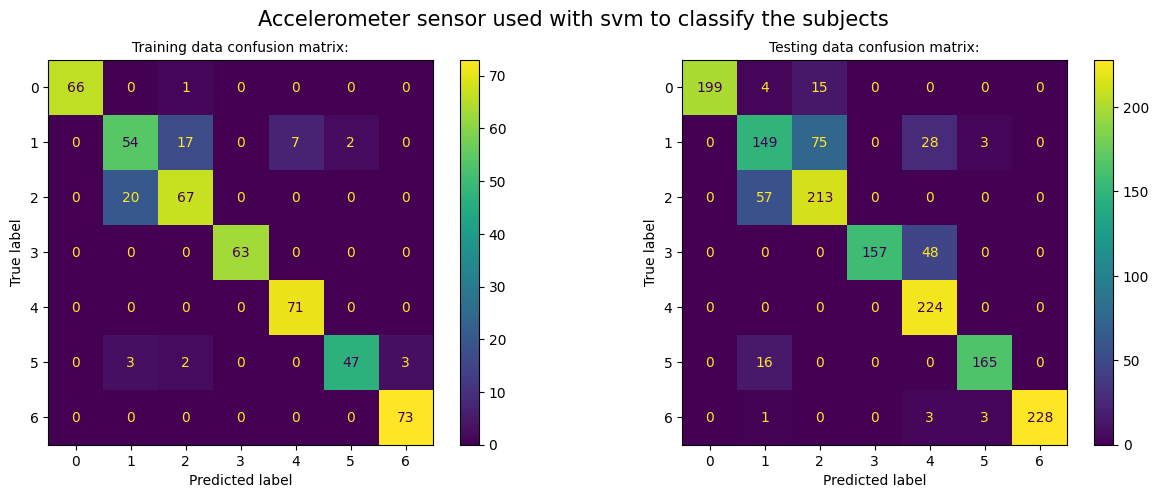

In [64]:
# Visualisation Accelerometer with svm:
visualize(act_svm_pred_train, labels_train, act_svm_pred_test, labels_test,
          main_title="Accelerometer sensor used with svm to classify the subjects")


Depth Camera sensor used with svm to classify the subjects
Training data F1 score =  1.0
Testing data F1 score =  0.9528413254989949


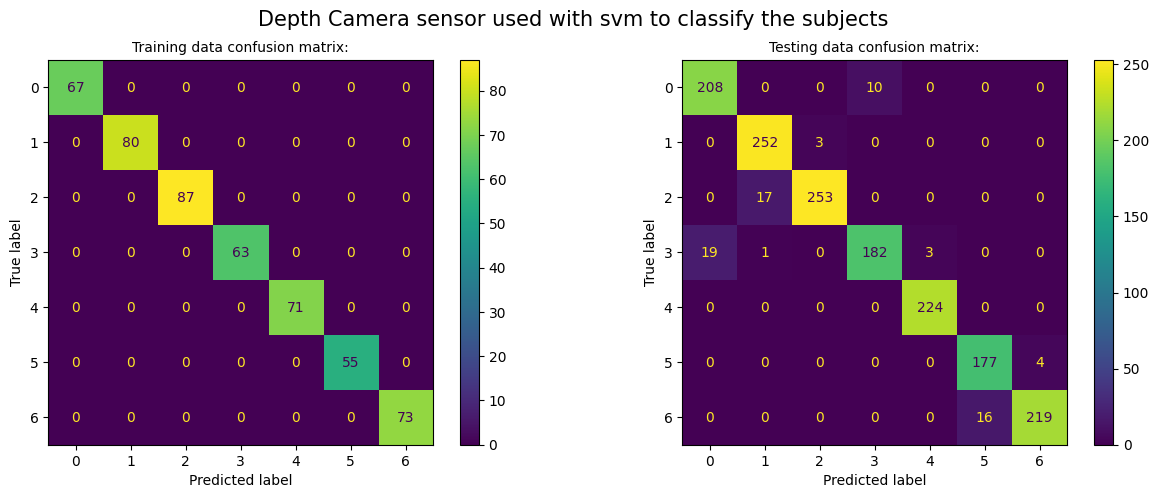

In [65]:
# Visualisation Depth Camera with svm:
visualize(dc_svm_pred_train, labels_train, dc_svm_pred_test, labels_test,
          main_title="Depth Camera sensor used with svm to classify the subjects")

In [66]:
#Combine the sensours
svm2_train, svm2_test = combine_probabilities(act_svm_proba_train,dc_svm_proba_train,
                                              act_svm_proba_test,dc_svm_proba_test)

Visualize SVM-act and SVM-dc Results :
SVM-act and SVM-dc with mean rule:
Training data F1 score =  1.0
Testing data F1 score =  0.9770767190968955
SVM-act and SVM-dc with sum rule:
Training data F1 score =  1.0
Testing data F1 score =  0.9770767190968955
SVM-act and SVM-dc with prod rule:
Training data F1 score =  1.0
Testing data F1 score =  0.9860105382479419
SVM-act and SVM-dc with max rule:
Training data F1 score =  1.0
Testing data F1 score =  0.9747523753628524
SVM-act and SVM-dc with min rule:
Training data F1 score =  1.0
Testing data F1 score =  0.9854183646053479


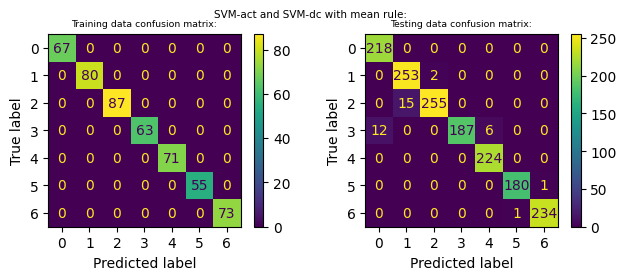

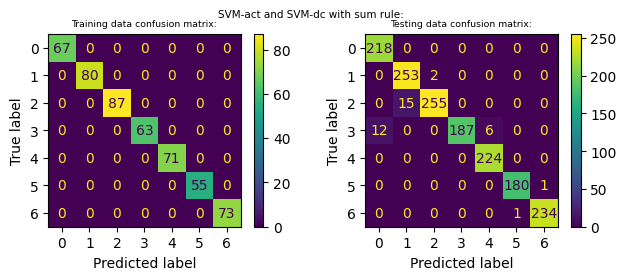

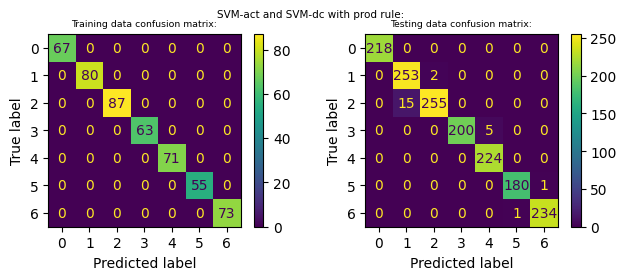

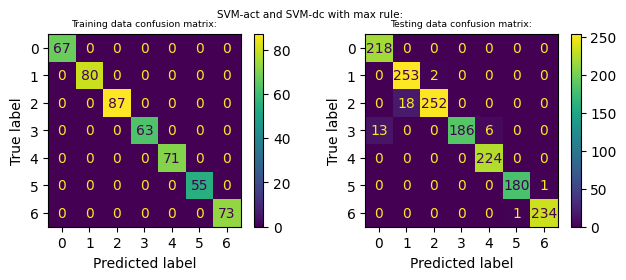

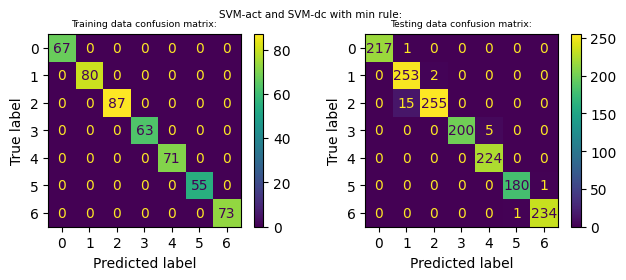

In [67]:
# Combine predictions SVM-act and SVM-dc
combine_visualize(svm2_train,labels_train,svm2_test,labels_test,"SVM-act and SVM-dc")

In [68]:
# 5.2

### Your code begins here ###
combined_features = np.concatenate((act_svm_proba_train,dc_svm_proba_train),axis=1)
combined_features_test = np.concatenate((act_svm_proba_test,dc_svm_proba_test),axis=1)
svm_params = {'C' : [0.1, 1.0, 10.0, 100.0], 'gamma' : [0.1, 0.25, 0.5, 0.75, 1.0, 2.0]}
svm_meta = svm_classify(combined_features, labels_train, combined_features_test, svm_params = svm_params)

print('C=',svm_meta.C)
print('gamma=',svm_meta.gamma)


### Your code ends here ###

C= 0.1
gamma= 0.1


In [ ]:
C = svm_meta.C
gamma = svm_meta.gamma
svm_meta = svm.SVC(kernel='rbf',random_state=0,gamma=gamma,C=C)
svm_meta.fit(combined_features,labels_train)

In [ ]:
svm_pred_train =  svm_meta.predict(combined_features)
svm_pred_test =   svm_meta.predict(combined_features_test)

Meta SVM-act and SVM-dc
Training data F1 score =  1.0
Testing data F1 score =  0.975598840174749


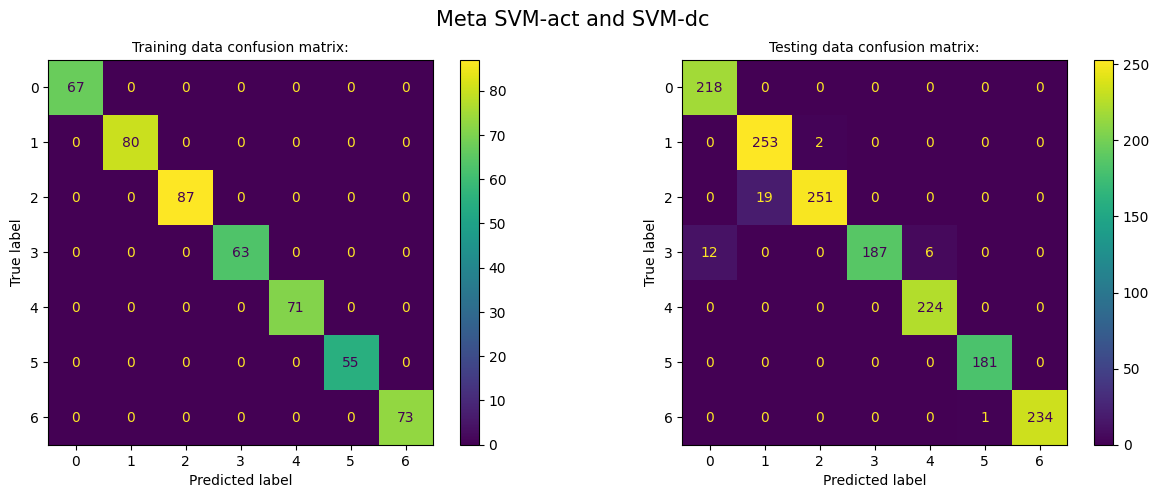

In [53]:
visualize(svm_pred_train,labels_train,svm_pred_test,labels_test,"Meta SVM-act and SVM-dc")

Meta Perceptron
Training data F1 score =  1.0
Testing data F1 score =  0.9690637343092501


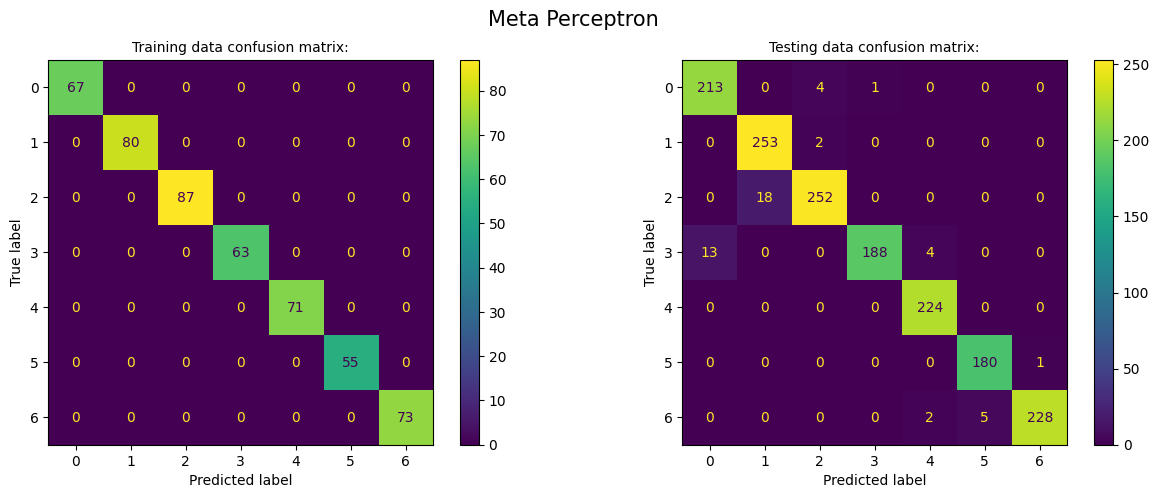

In [105]:
from sklearn.linear_model import Perceptron
perc = Perceptron(tol=1e-3, random_state=0)
perc.fit(combined_features, labels_train)
perc_pred_train =  perc.predict(combined_features)
perc_pred_test =   perc.predict(combined_features_test)
visualize(perc_pred_train,labels_train,perc_pred_test,labels_test,"Meta Perceptron")

Meta Perceptron
Training data F1 score =  1.0
Testing data F1 score =  0.9754441608128015


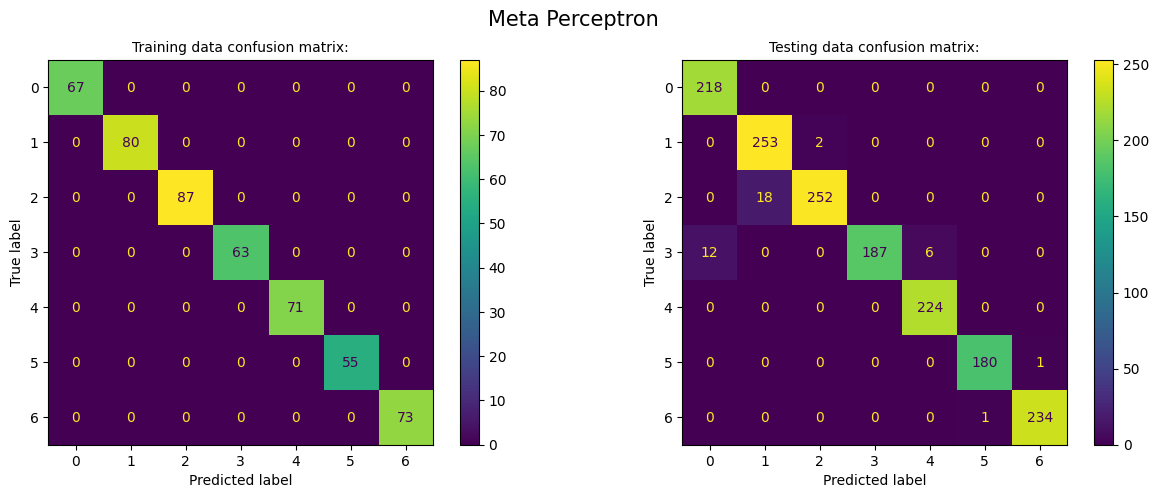

In [108]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=100)
neigh.fit(combined_features, labels_train)
neigh_pred_train =  neigh.predict(combined_features)
neigh_pred_test =   neigh.predict(combined_features_test)
visualize(neigh_pred_train,labels_train,neigh_pred_test,labels_test,"Meta Perceptron")